In [ ]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from matplotlib import offsetbox
import numpy as np

faces = fetch_lfw_people(min_faces_per_person = 30)
faces.data.shape

(2370, 2914)

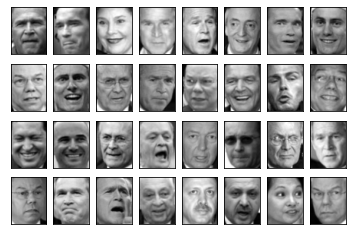

In [ ]:
fig, ax = plt.subplots(4, 8, subplot_kw = dict(xticks = [], yticks = []))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gray')

In [ ]:
model = Isomap(n_components = 2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [ ]:
def plot_components(data, model, images = None, ax = None,
                    thumb_frac = 0.05, cmap = 'gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

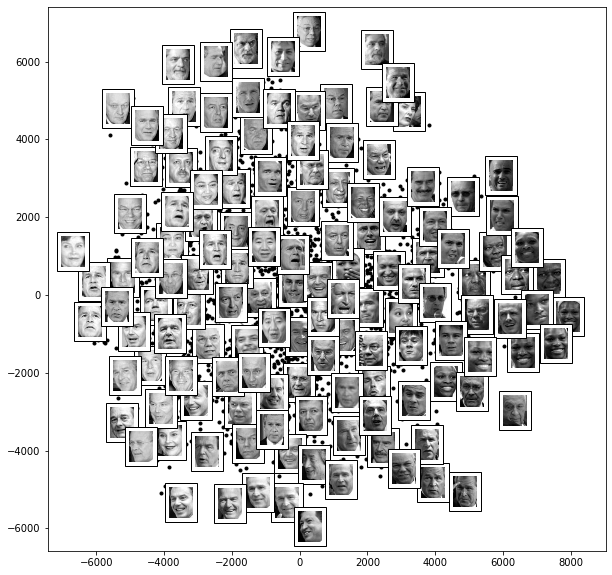

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_components(faces.data,
                model = Isomap(n_components = 2),
                images = faces.images[:, : : 2, : : 2])